# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('training.csv')
df['class'] = df['class'].replace({'w': 0, 'n': 1}) # 'w' indicates 'dead trees'; 'n' indicates 'other land covers'
df = df.dropna()

df

C:\Users\barri\AppData\Local\Temp\ipykernel_8148\2535262227.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'w': 0, 'n': 1}) # 'w' indicates 'dead trees'; 'n' indicates 'other land covers'


class    GLCM_pan  Mean_Green    Mean_Red    Mean_NIR     SD_pan
0         0  120.362774  205.500000  119.395349  416.581395  20.676318
1         0  124.739583  202.800000  115.333333  354.333333  16.707151
2         0  134.691964  199.285714  116.857143  477.857143  22.496712
3         0  127.946309  178.368421   92.368421  278.473684  14.977453
4         0  135.431548  197.000000  112.690476  532.952381  17.604193
...     ...         ...         ...         ...         ...        ...
4334      1  111.568773  203.588235   93.264706  403.735294  26.512777
4335      1  125.435240  206.394161   93.058394  512.270073  33.466060
4336      1  132.123859  465.343750  295.333333  499.250000  38.762967
4337      1  124.469536  215.152632   98.484211  675.915789  28.506542
4338      1  125.171928  559.048000  365.968000  439.272000  15.392322

[4339 rows x 6 columns]

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

In [2]:
num = 10
size = len(df)


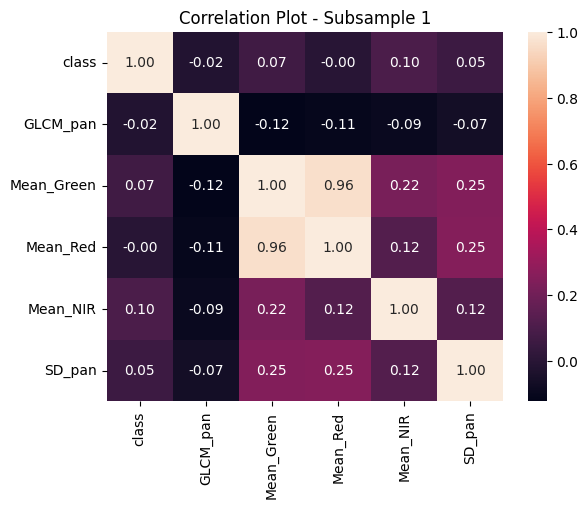

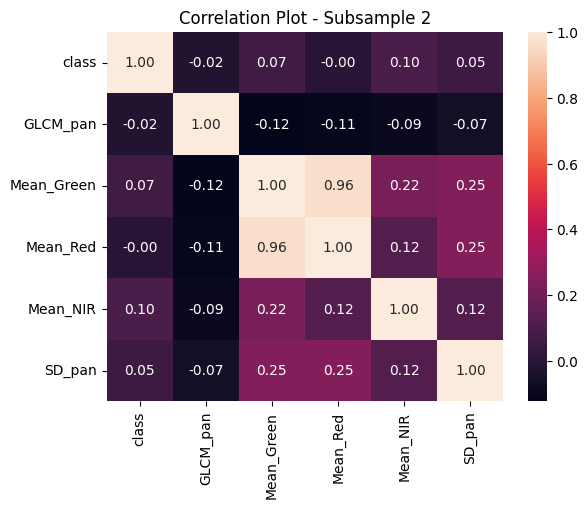

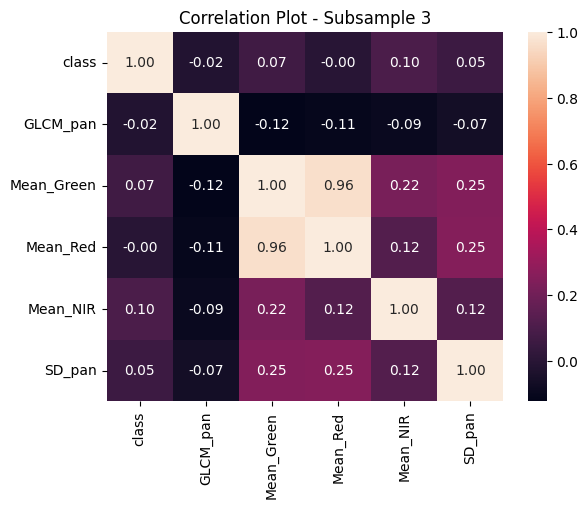

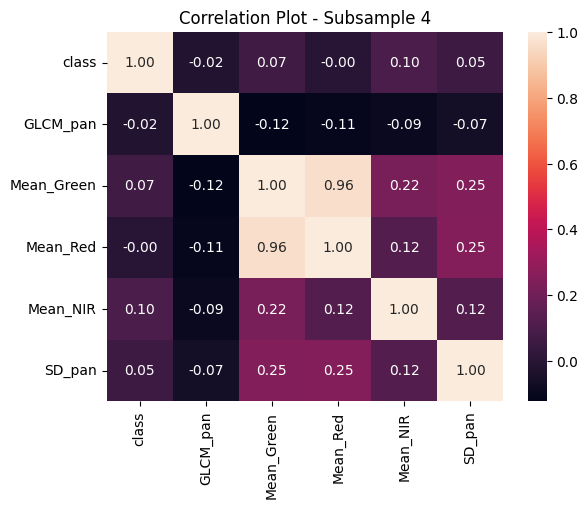

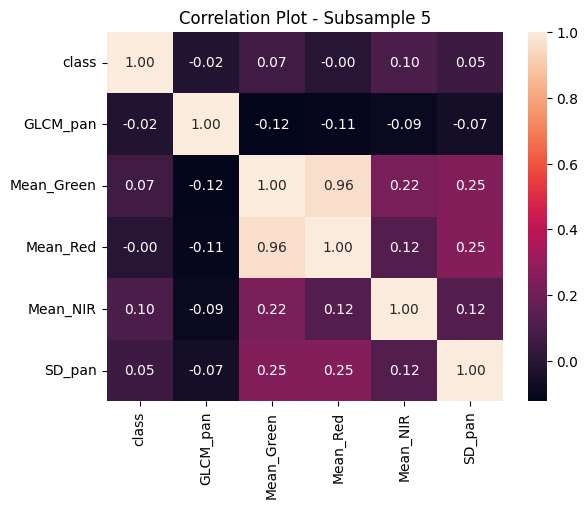

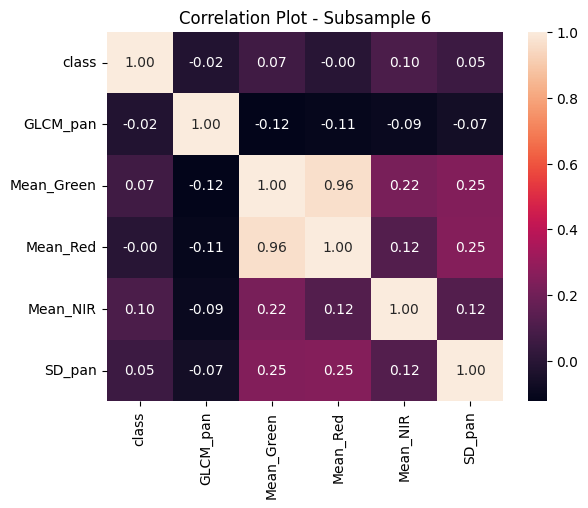

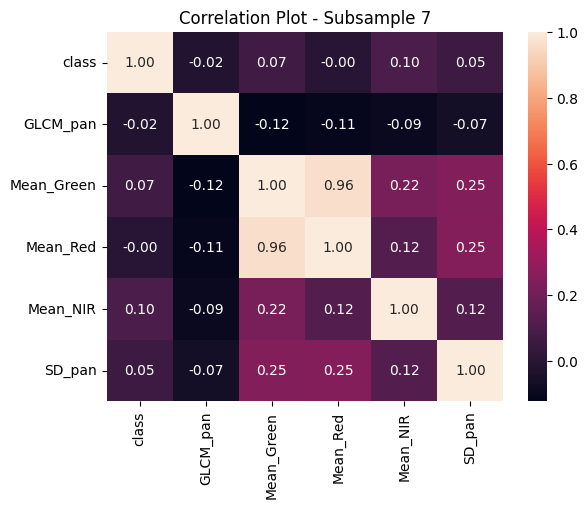

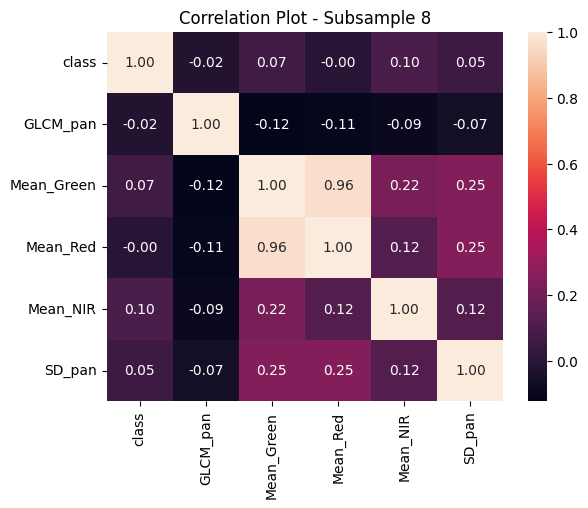

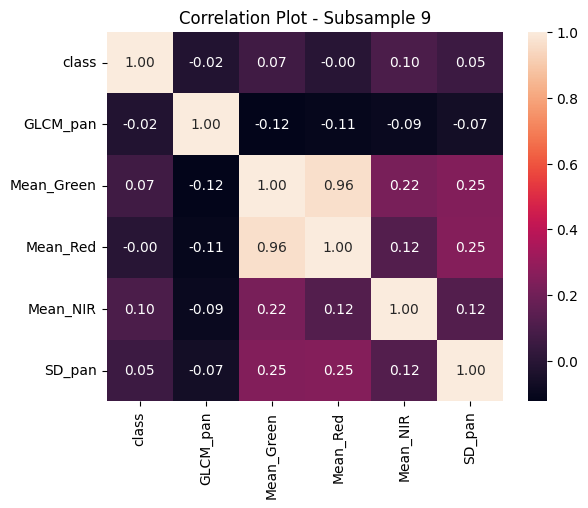

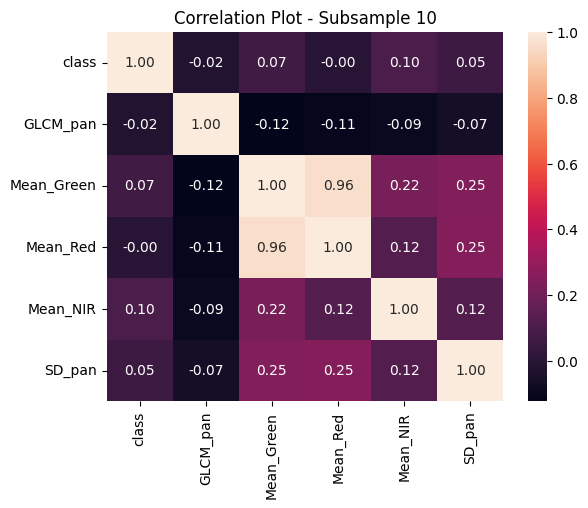

In [3]:
for i in range(num):
    subsample = df.sample(size)
    corr = subsample.corr()

    sns.heatmap(corr, annot = True, fmt=".2f")
    plt.title(f'Correlation Plot - Subsample {i+1}')
    plt.show()

**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced**

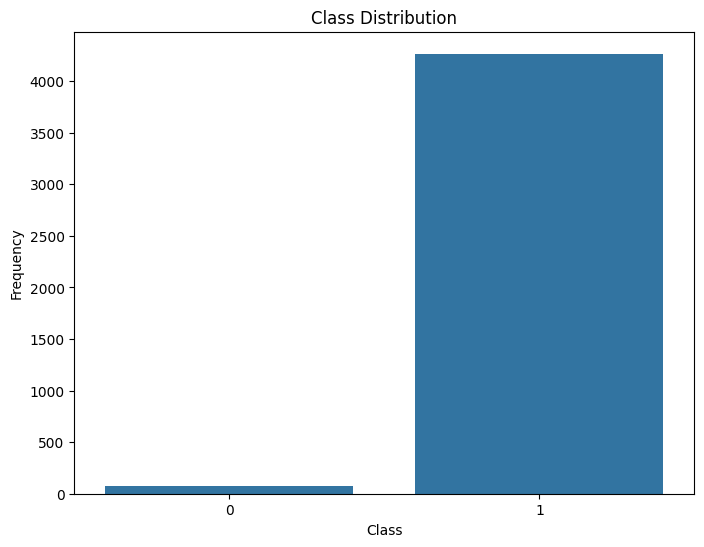

In [4]:
# Count the frequency of each class
class_counts = df['class'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

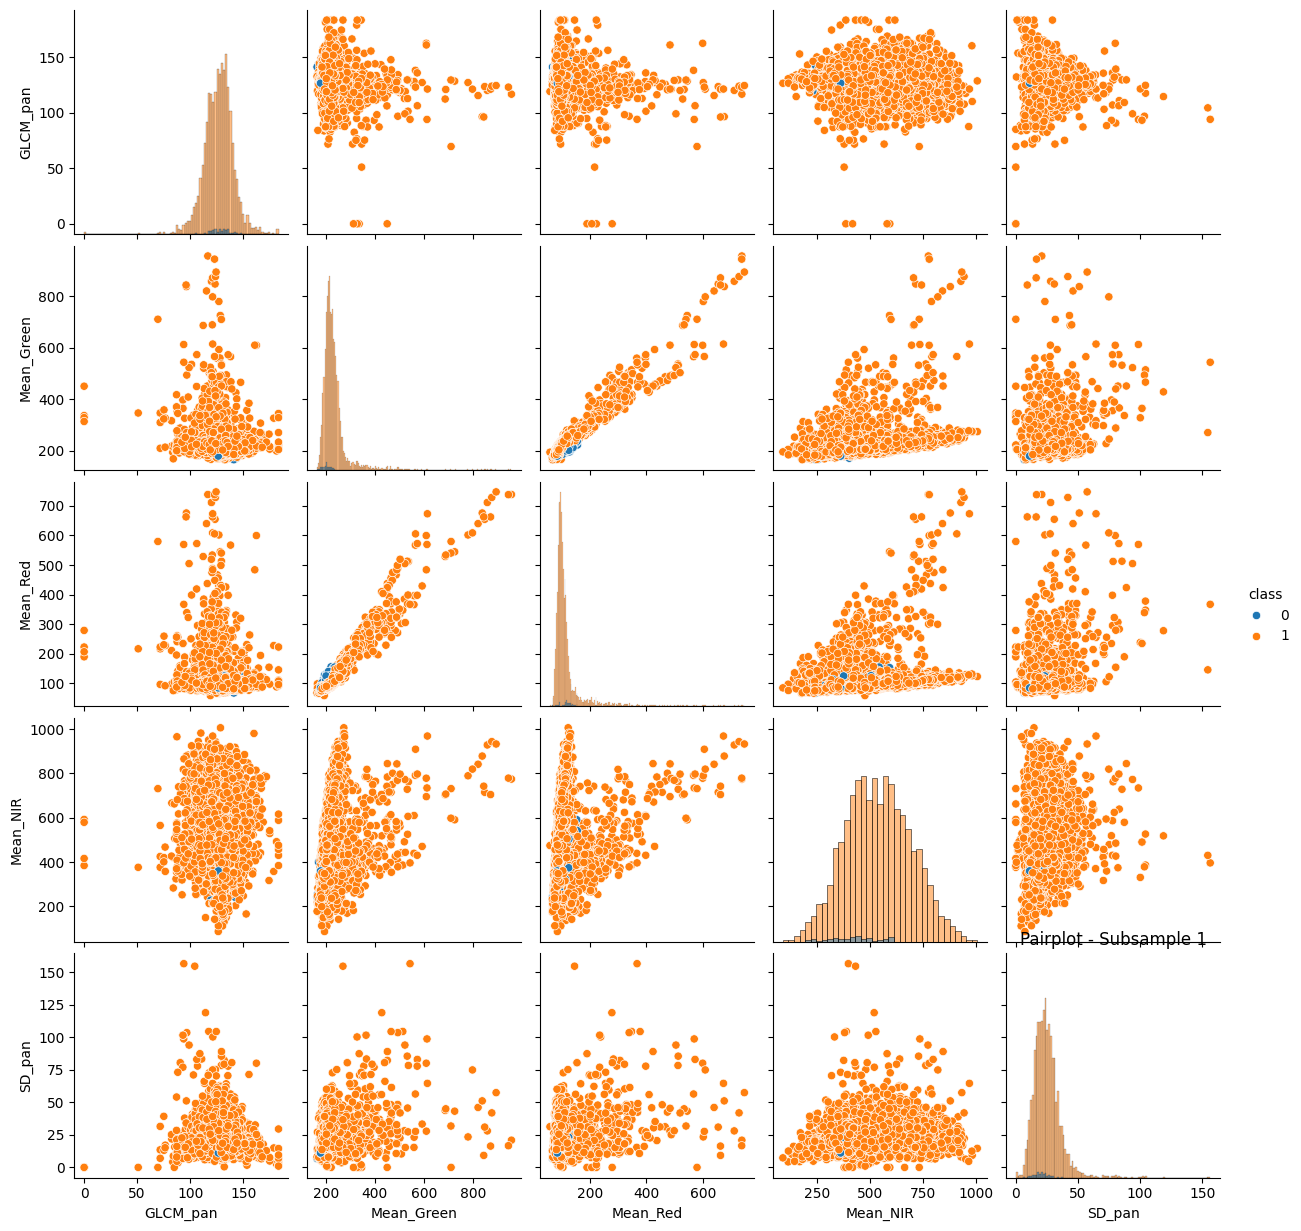

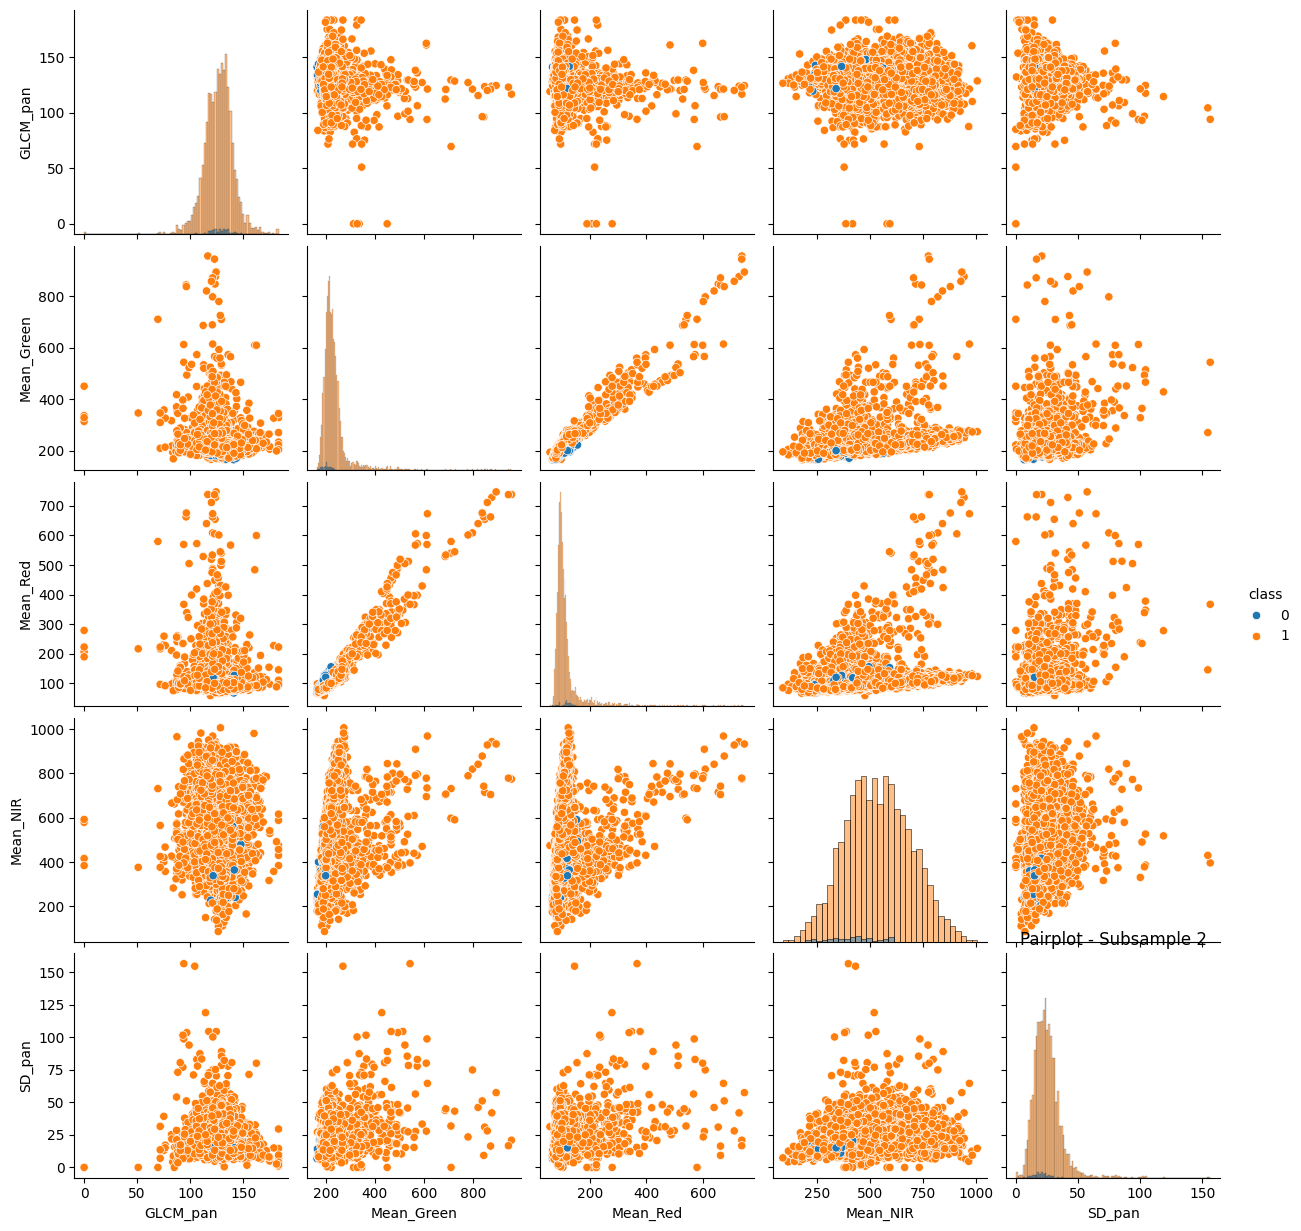

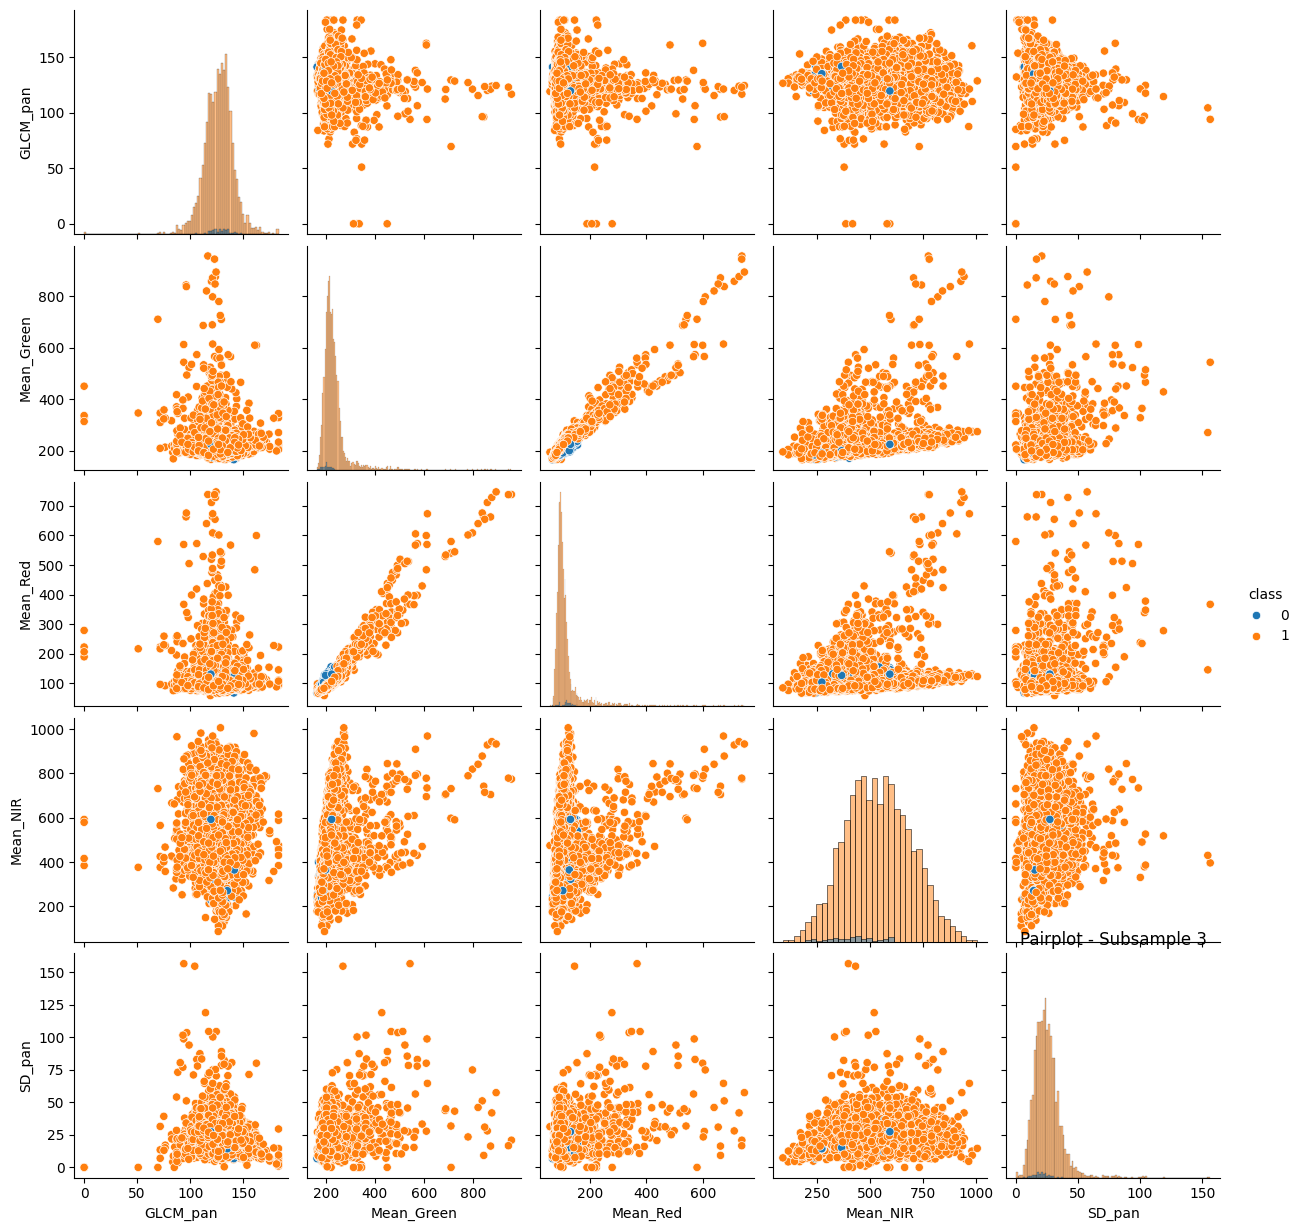

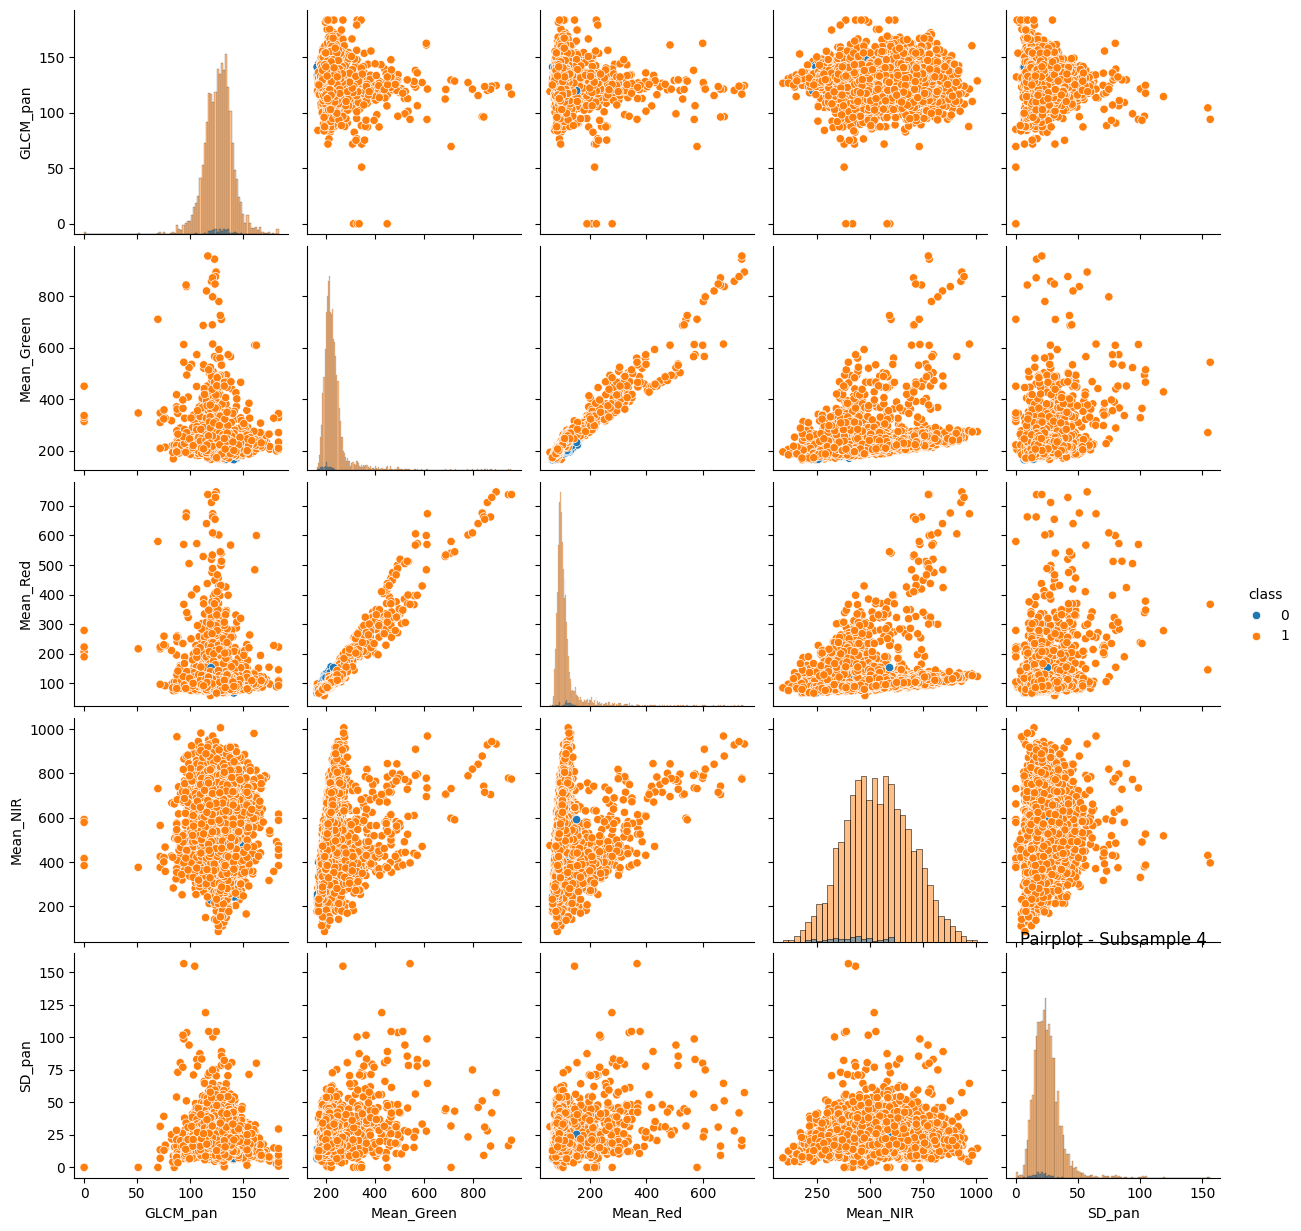

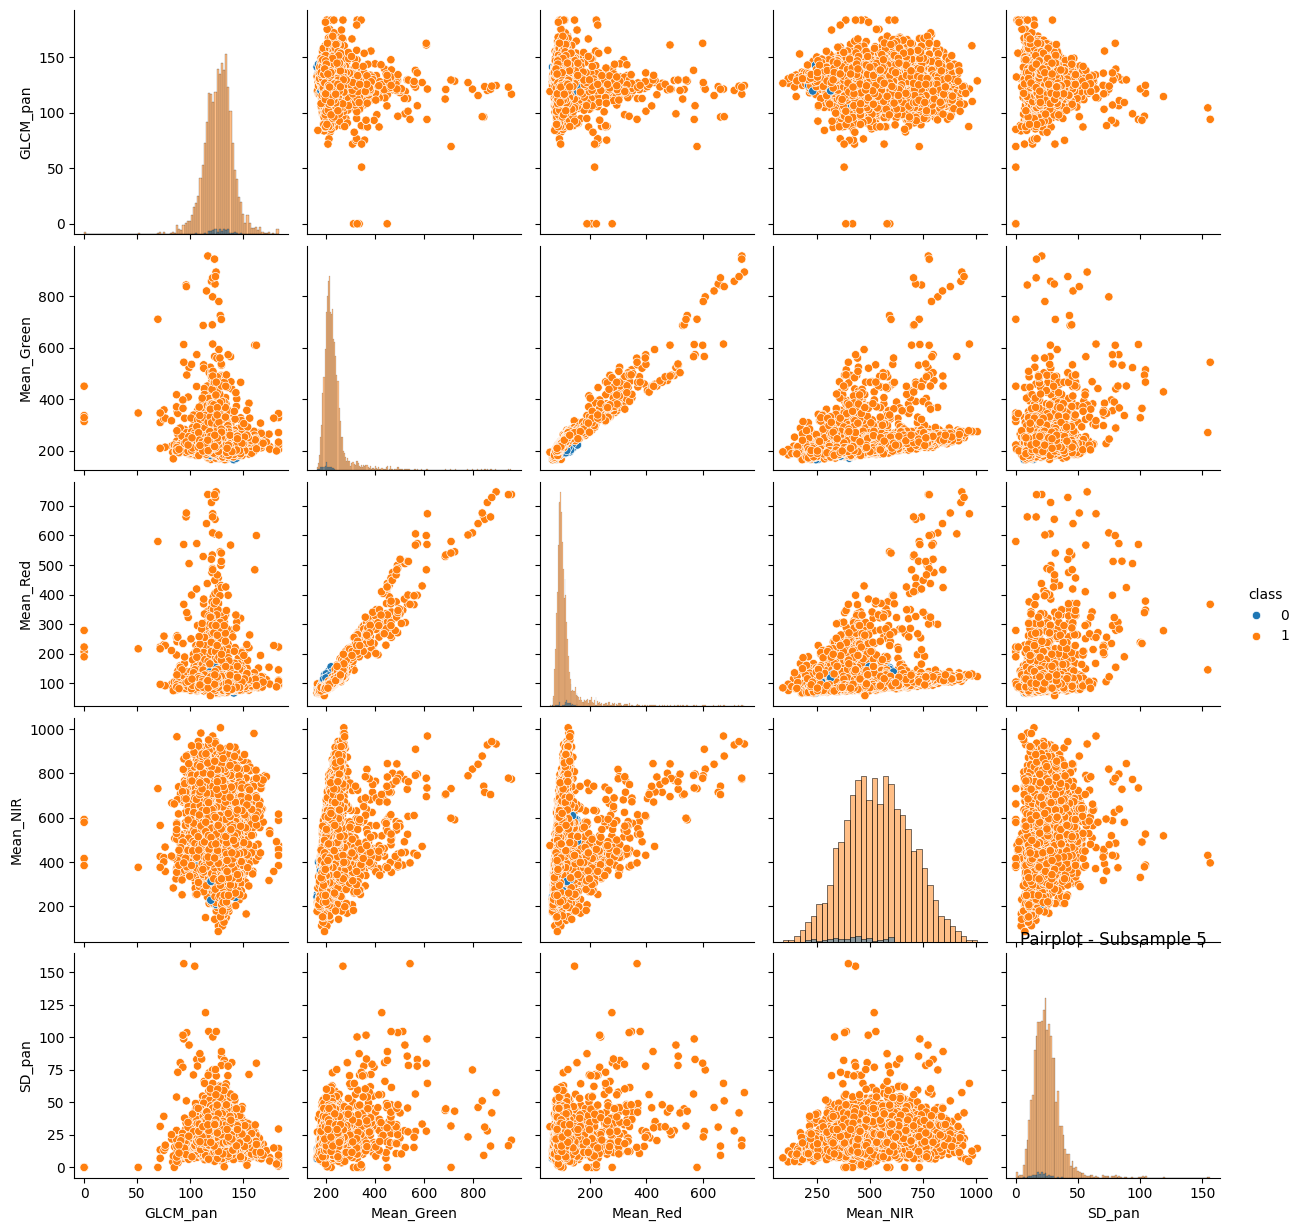

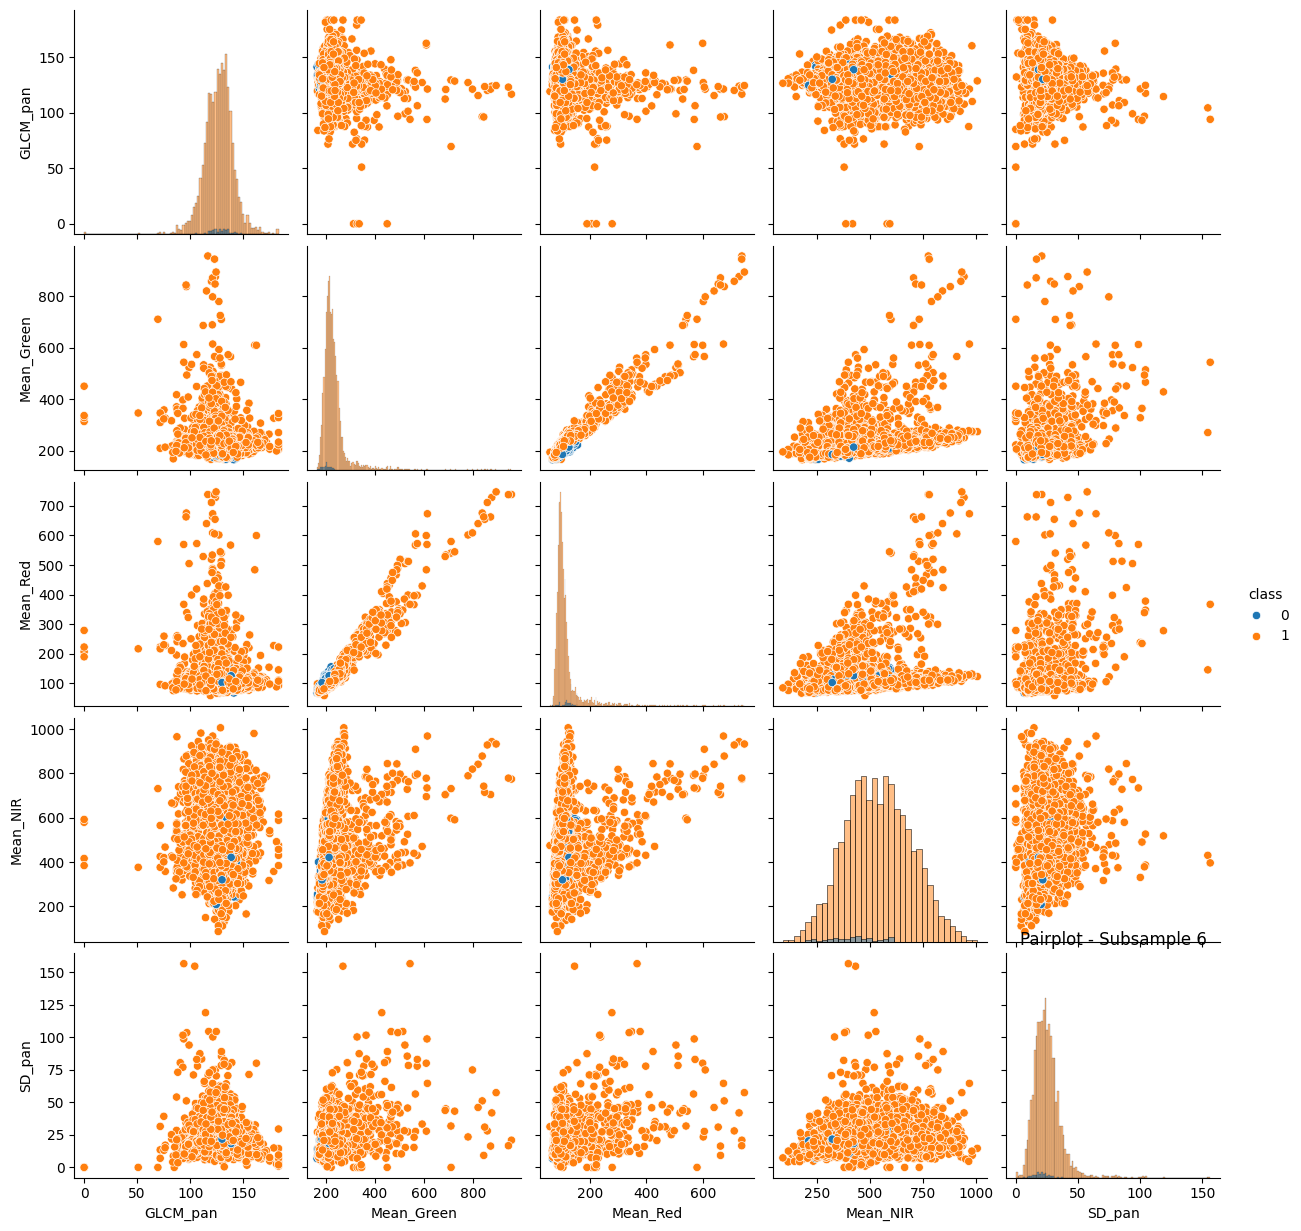

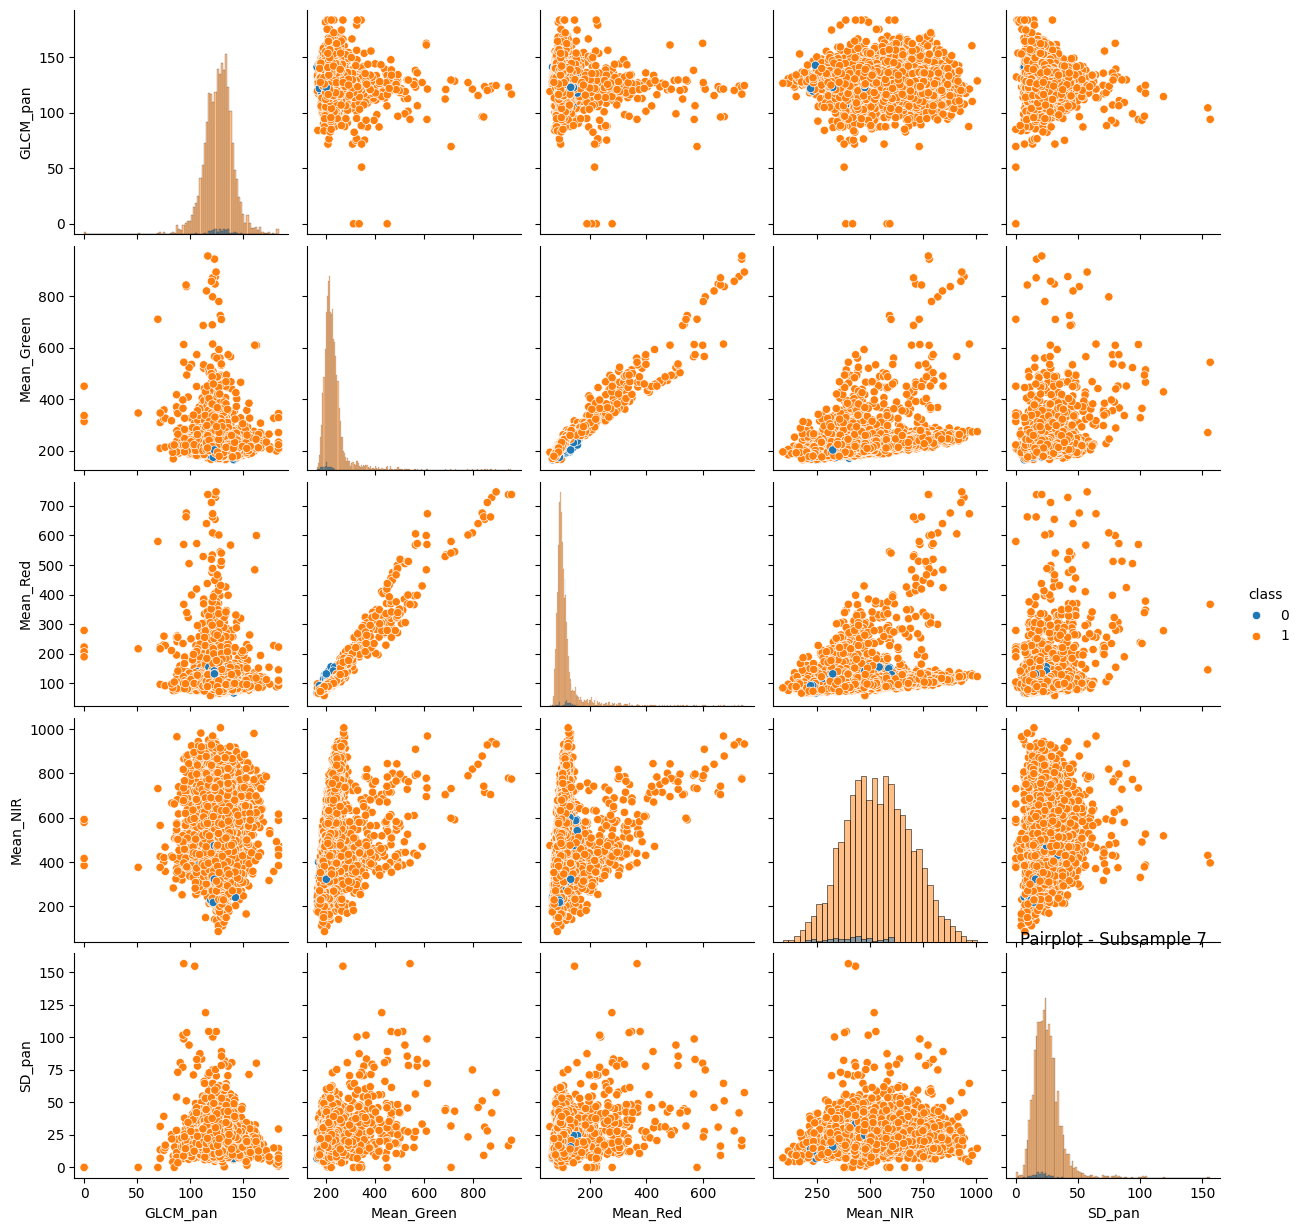

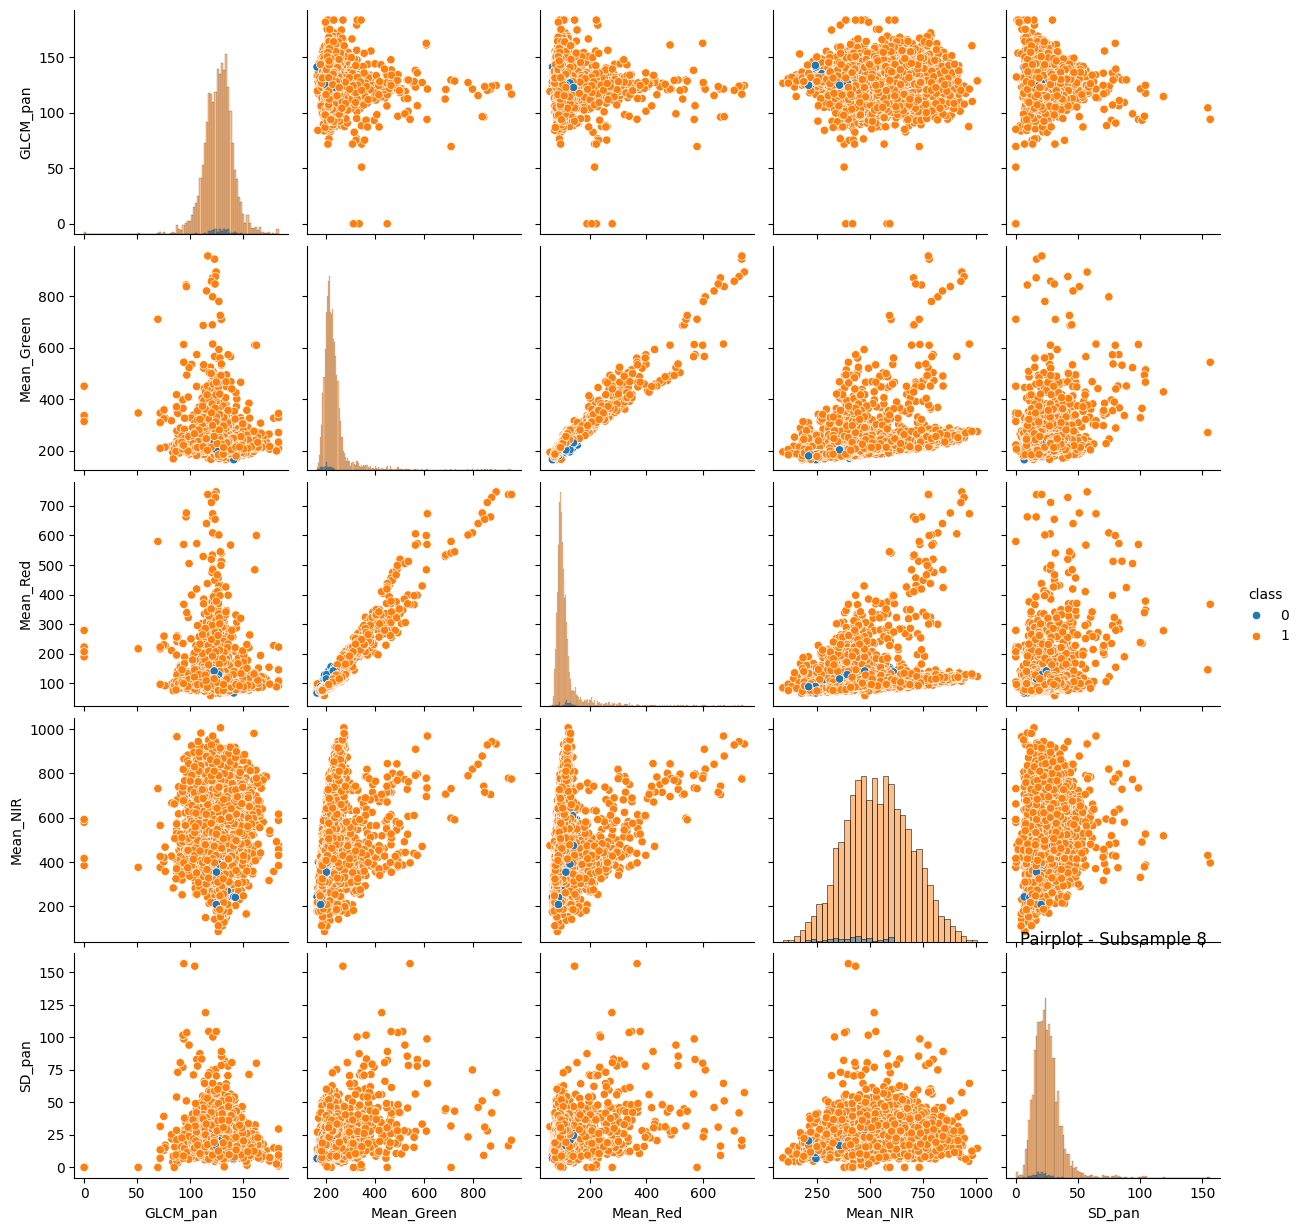

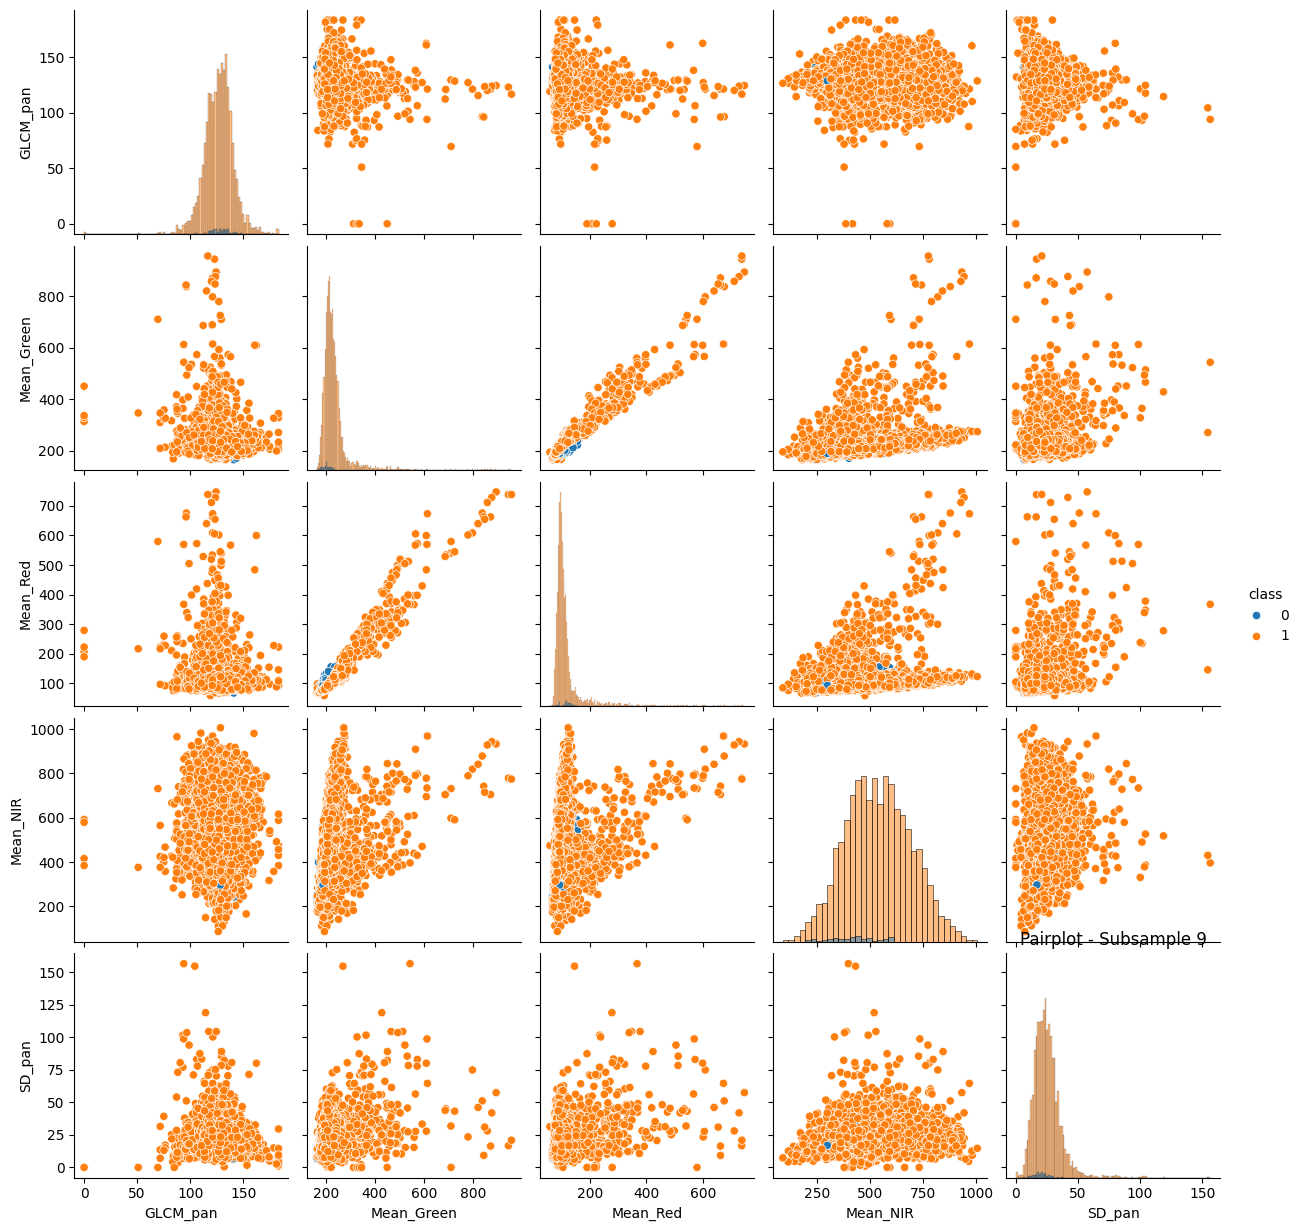

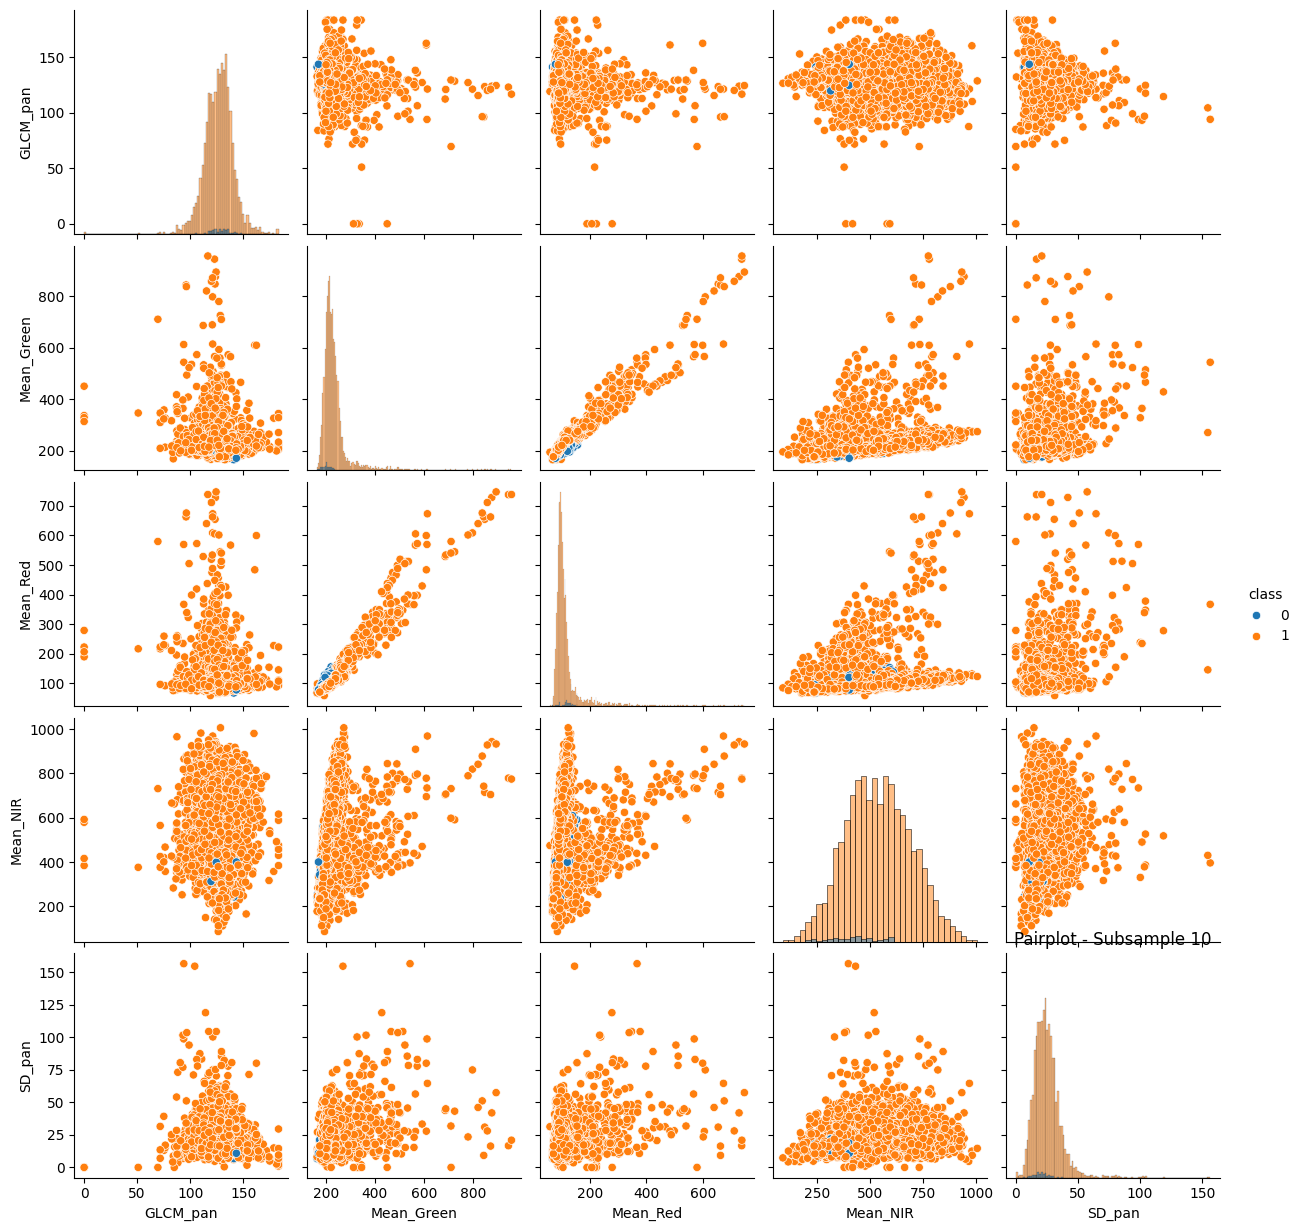

In [5]:
for i in range(num):
    subsample = df.sample(size)
    
    # Creating pairplot
    sns.pairplot(subsample, hue='class', diag_kind='hist')
    plt.title(f'Pairplot - Subsample {i+1}')
    plt.show()

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

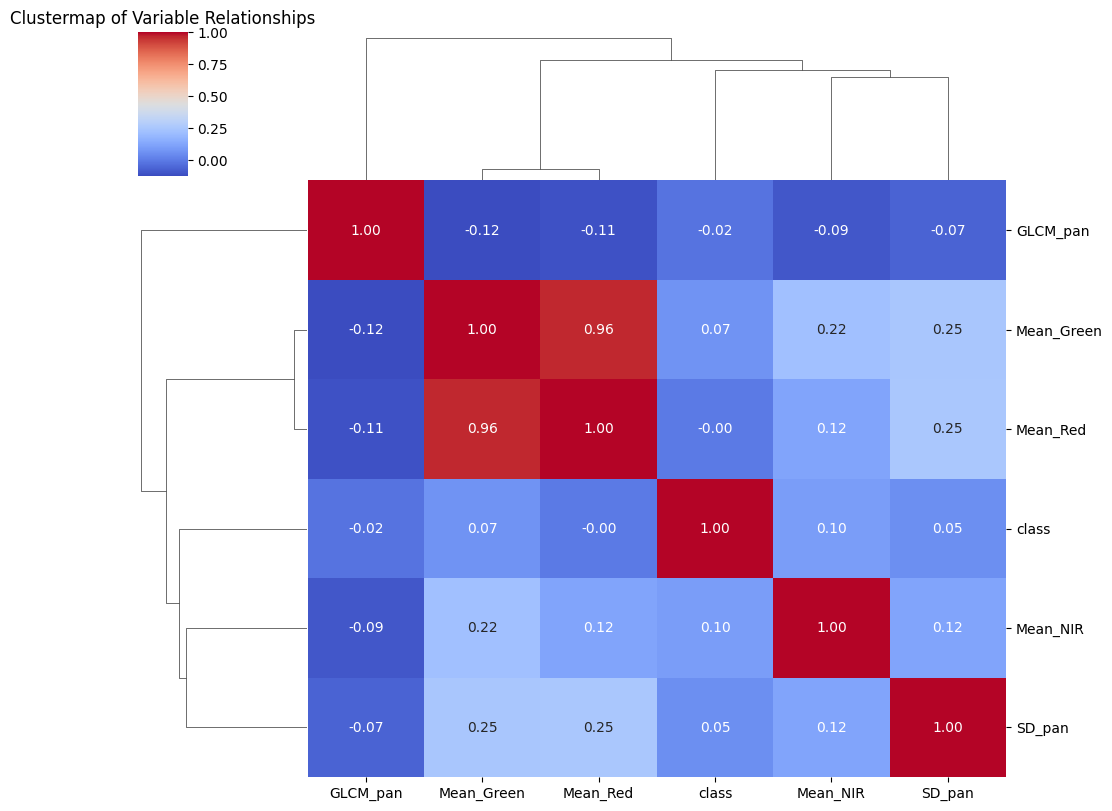

In [6]:
# Create a correlation matrix
corr_matrix = df.corr()

# Create a clustermap
sns.clustermap(corr_matrix, cmap='coolwarm', figsize=(10, 8), annot=True, fmt=".2f")
plt.title('Clustermap of Variable Relationships')
plt.show()

**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

- Perform SVM Modelling

In [7]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

# Separate features (X) and target variable (y)
X = df.drop(columns=['class'])  # Features
y = df['class']                 # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # Initialize SVM model with RBF kernel
svm_model.fit(X_train, y_train)  # Train the model on the training data

SVC(random_state=42)

- Check Model's Performance


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load and preprocess the training data
df_train = pd.read_csv('training.csv')
df_train['class'] = df_train['class'].replace({'w': 0, 'n': 1})  # Convert target variable to numeric
df_train = df_train.dropna()  # Drop rows with missing values

# Separate features (X_train) and target variable (y_train)
X_train = df_train.drop(columns=['class'])  # Features
y_train = df_train['class']                 # Target variable

# Step 2: Load and preprocess the testing data
df_test = pd.read_csv('testing.csv')
df_test['class'] = df_test['class'].replace({'w': 0, 'n': 1})  # Convert target variable to numeric
df_test = df_test.dropna()  # Drop rows with missing values

# Separate features (X_test) and target variable (y_test)
X_test = df_test.drop(columns=['class'])  # Features
y_test = df_test['class']                 # Target variable

# Step 3: Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # Initialize SVM model with RBF kernel
svm_model.fit(X_train, y_train)  # Train the model on the training data

# Step 4: Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Step 5: Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.626
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       187
           1       0.63      1.00      0.77       313

    accuracy                           0.63       500
   macro avg       0.31      0.50      0.38       500
weighted avg       0.39      0.63      0.48       500



C:\Users\barri\AppData\Local\Temp\ipykernel_8148\2592620220.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['class'] = df_train['class'].replace({'w': 0, 'n': 1})  # Convert target variable to numeric
C:\Users\barri\AppData\Local\Temp\ipykernel_8148\2592620220.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['class'] = df_test['class'].replace({'w': 0, 'n': 1})  # Convert target variable to numeric
C:\Users\barri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1

In [9]:
confusion_matrix(y_test, y_pred)

array([[  0, 187],
       [  0, 313]], dtype=int64)

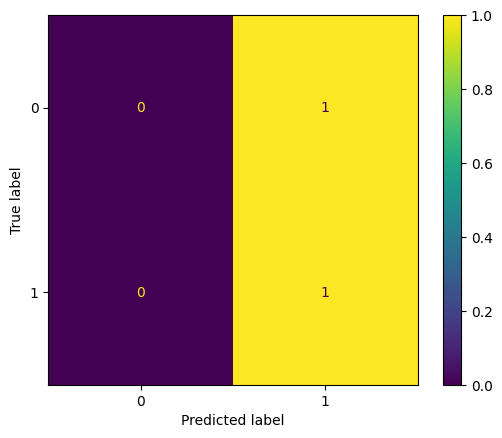

In [10]:
ConfusionMatrixDisplay.from_estimator(svm_model,X_test,y_test,normalize='true')


- Improve Model Performance with GridSearch


In [11]:
svm = SVC()
param_grid = {'C':[0.01, 0.05, 0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)
grid.fit(X_test, y_test)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [12]:
grid.best_score_

0.86

In [13]:
grid.best_params_


{'C': 0.1, 'kernel': 'linear'}

- Using Recommended Parameters from GridSearch


In [14]:
grid_model = SVC(kernel='linear', C=0.01)
grid_model.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

- Checking the Current Performance


In [15]:
y_pred = grid_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 61, 126],
       [ 22, 291]], dtype=int64)

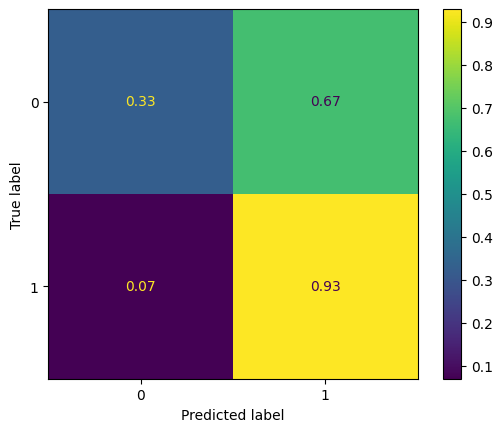

In [16]:
ConfusionMatrixDisplay.from_estimator(grid_model,X_test,y_test,normalize='true')


In [17]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.73      0.33      0.45       187
           1       0.70      0.93      0.80       313

    accuracy                           0.70       500
   macro avg       0.72      0.63      0.62       500
weighted avg       0.71      0.70      0.67       500



# woah it improved!